In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, RNN

import warnings
warnings.filterwarnings('ignore')

In [72]:
plt.rcParams["figure.figsize"] = (9,6)

In [73]:
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)

In [74]:
df_raw = pd.read_csv('data/dhaka_raw.csv',index_col=['datetime'],parse_dates=True)

In [75]:
df_raw.head()

,tempmax_x,tempmin_x,temp,feelslikemax_x,feelslikemin_x,feelslike,dew,humidity,precip,precipprob,...,solarradiation,solarenergy,uvindex,apparent_temperature_mean,precipitation_sum,precipitation_hours,windspeed_y,et0_fao_evapotranspiration,river_discharge,rain_sum
datetime,,,,,,,,,,,,,,,,,,,,,
2013-01-01,25.0,11.4,17.8,25.0,11.4,17.8,12.2,73.1,0.0,0,...,170.7,14.7,7,17.0,0.0,0,10.5,3.01,0.22,0.0
2013-02-01,25.0,12.4,18.7,25.0,12.4,18.7,13.0,71.5,0.0,0,...,167.0,14.3,6,18.2,0.0,0,9.5,2.90,0.22,0.0
2013-03-01,25.0,15.9,19.1,25.0,15.9,19.1,13.9,73.3,0.2,100,...,93.3,8.1,3,19.1,0.0,0,6.8,1.26,0.22,0.0
2013-04-01,25.0,15.9,20.0,25.0,15.9,20.0,15.7,77.6,0.0,0,...,164.6,14.2,6,19.7,0.0,0,8.9,2.43,0.22,0.0
2013-05-01,25.0,15.0,19.1,25.0,15.0,19.1,13.9,73.5,0.0,0,...,171.2,14.9,7,17.8,0.0,0,9.3,3.00,0.22,0.0


In [76]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3881 entries, 2013-01-01 to 2023-08-17
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tempmax_x                   3881 non-null   float64
 1   tempmin_x                   3881 non-null   float64
 2   temp                        3881 non-null   float64
 3   feelslikemax_x              3881 non-null   float64
 4   feelslikemin_x              3881 non-null   float64
 5   feelslike                   3881 non-null   float64
 6   dew                         3881 non-null   float64
 7   humidity                    3881 non-null   float64
 8   precip                      3881 non-null   float64
 9   precipprob                  3881 non-null   int64  
 10  precipcover                 3881 non-null   float64
 11  windspeed_x                 3881 non-null   float64
 12  winddir                     3881 non-null   float64
 13  sealevelpressur

In [77]:
df_raw.isnull().sum()

tempmax_x                     0
tempmin_x                     0
temp                          0
feelslikemax_x                0
feelslikemin_x                0
feelslike                     0
dew                           0
humidity                      0
precip                        0
precipprob                    0
precipcover                   0
windspeed_x                   0
winddir                       0
sealevelpressure              3
cloudcover                    0
visibility                    0
solarradiation                0
solarenergy                   0
uvindex                       0
apparent_temperature_mean     0
precipitation_sum             0
precipitation_hours           0
windspeed_y                   0
et0_fao_evapotranspiration    0
river_discharge               0
rain_sum                      0
dtype: int64

In [78]:
df_raw['sealevelpressure']

datetime
2013-01-01    1011.5
2013-02-01    1012.1
2013-03-01    1012.9
2013-04-01    1012.7
2013-05-01    1011.4
               ...  
2023-08-13    1003.7
2023-08-14    1004.3
2023-08-15    1004.1
2023-08-16    1003.5
2023-08-17    1002.8
Name: sealevelpressure, Length: 3881, dtype: float64

In [79]:
df = df_raw.fillna(method='ffill')

In [80]:
df.isnull().sum()

tempmax_x                     0
tempmin_x                     0
temp                          0
feelslikemax_x                0
feelslikemin_x                0
feelslike                     0
dew                           0
humidity                      0
precip                        0
precipprob                    0
precipcover                   0
windspeed_x                   0
winddir                       0
sealevelpressure              0
cloudcover                    0
visibility                    0
solarradiation                0
solarenergy                   0
uvindex                       0
apparent_temperature_mean     0
precipitation_sum             0
precipitation_hours           0
windspeed_y                   0
et0_fao_evapotranspiration    0
river_discharge               0
rain_sum                      0
dtype: int64

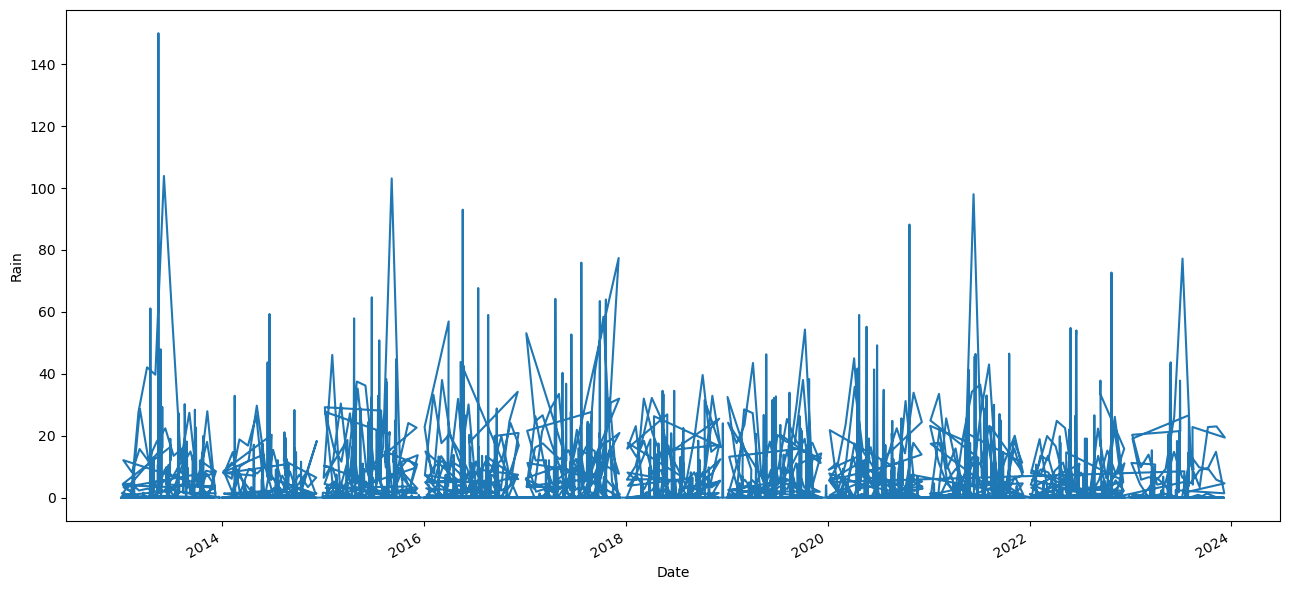

In [81]:
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(df['rain_sum'])
ax.set_xlabel('Date')
ax.set_ylabel('Rain')

fig.autofmt_xdate()
plt.tight_layout()

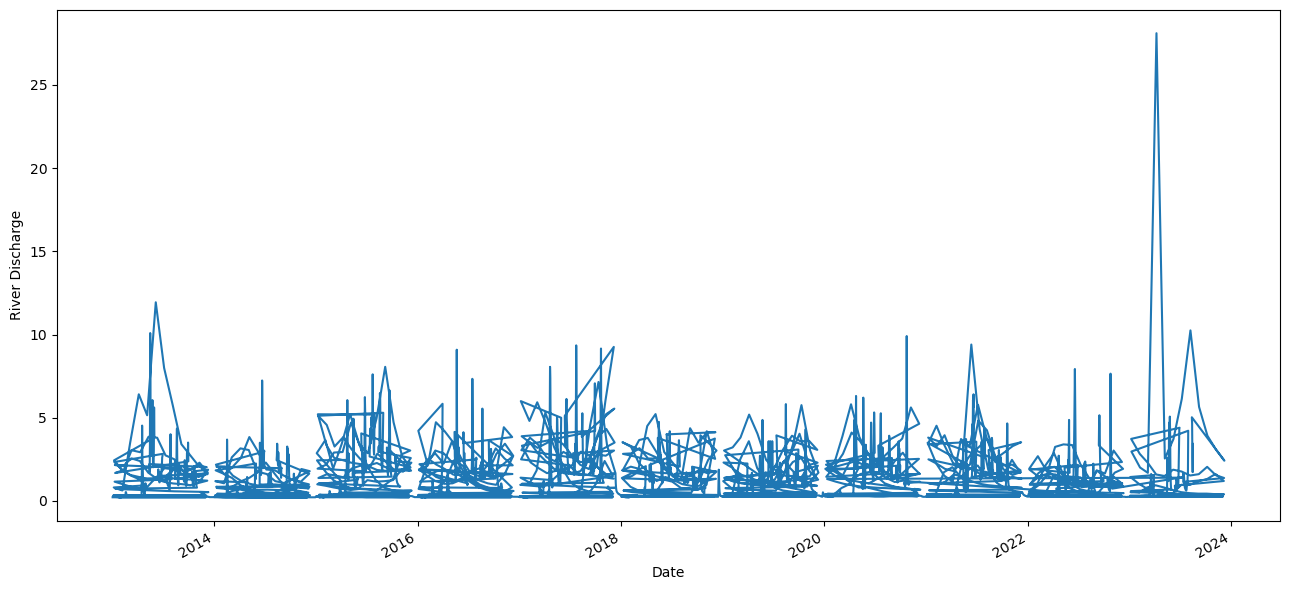

In [82]:
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(df['river_discharge'])
ax.set_xlabel('Date')
ax.set_ylabel('River Discharge')

fig.autofmt_xdate()
plt.tight_layout()

In [83]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tempmax_x,3881.0,31.081912,3.613910,16.00,29.00,32.00,34.00,42.00
tempmin_x,3881.0,23.099794,4.624058,7.00,19.50,25.00,27.00,30.00
temp,3881.0,26.728549,3.915996,11.40,24.10,28.00,29.70,34.10
feelslikemax_x,3881.0,35.402834,6.699066,16.00,29.40,36.80,40.70,54.60
feelslikemin_x,3881.0,24.272610,5.963065,5.50,19.50,25.00,30.10,37.40
feelslike,3881.0,29.453440,6.160665,10.90,24.10,30.70,34.70,41.70
dew,3881.0,20.673254,4.487165,6.70,16.80,22.20,24.60,26.80
humidity,3881.0,71.219660,9.094490,33.20,65.50,71.20,77.50,94.10
precip,3881.0,8.035455,16.285925,0.00,0.00,0.90,9.40,209.50
precipprob,3881.0,56.737954,49.550304,0.00,0.00,100.00,100.00,100.00


In [84]:
n = len(df)

# Split 70:20:10 (train:validation:test)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

train_df.shape, val_df.shape, test_df.shape

((2716, 26), (776, 26), (389, 26))

In [85]:
RD_max_train = np.max(train_df['river_discharge'])
RD_min_train = np.min(train_df['river_discharge'])
RD_max_test = np.max(test_df['river_discharge'])
RD_min_test = np.min(test_df['river_discharge'])

R_max_train = np.max(train_df['rain_sum'])
R_min_train = np.min(train_df['rain_sum'])
R_max_test = np.max(test_df['rain_sum'])
R_min_test = np.min(test_df['rain_sum'])


In [86]:
print(river_dis_max_train,river_dis_min_train,river_dis_max_test,river_dis_min_test)

print(rain_max_train, rain_min_train,rain_max_test,rain_min_test)

11.94 0.2 28.11 0.25
150.0 0.0 98.0 0.0


In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)
test_scaler = MinMaxScaler()
test_scaler.fit(test_df)

train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df[test_df.columns] = test_scaler.transform(test_df[test_df.columns])

In [88]:
train_df.head()

,tempmax_x,tempmin_x,temp,feelslikemax_x,feelslikemin_x,feelslike,dew,humidity,precip,precipprob,...,solarradiation,solarenergy,uvindex,apparent_temperature_mean,precipitation_sum,precipitation_hours,windspeed_y,et0_fao_evapotranspiration,river_discharge,rain_sum
datetime,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.346154,0.191304,0.281938,0.233161,0.184953,0.224026,0.273632,0.655172,0.000000,0.0,...,0.454145,0.451064,0.625,0.197761,0.0,0.0,0.160526,0.354839,0.001704,0.0
2013-02-01,0.346154,0.234783,0.321586,0.233161,0.216301,0.253247,0.313433,0.628900,0.000000,0.0,...,0.440572,0.434043,0.500,0.242537,0.0,0.0,0.134211,0.338710,0.001704,0.0
2013-03-01,0.346154,0.386957,0.339207,0.233161,0.326019,0.266234,0.358209,0.658456,0.000955,1.0,...,0.170213,0.170213,0.125,0.276119,0.0,0.0,0.063158,0.098240,0.001704,0.0
2013-04-01,0.346154,0.386957,0.378855,0.233161,0.326019,0.295455,0.447761,0.729064,0.000000,0.0,...,0.431768,0.429787,0.500,0.298507,0.0,0.0,0.118421,0.269795,0.001704,0.0
2013-05-01,0.346154,0.347826,0.339207,0.233161,0.297806,0.266234,0.358209,0.661741,0.000000,0.0,...,0.455979,0.459574,0.625,0.227612,0.0,0.0,0.128947,0.353372,0.001704,0.0


In [89]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tempmax_x,2716.0,0.575152,0.141023,0.0,0.500000,0.615385,0.680769,1.0
tempmin_x,2716.0,0.682838,0.202381,0.0,0.521739,0.739130,0.860870,1.0
temp,2716.0,0.661468,0.175290,0.0,0.546256,0.713656,0.797357,1.0
feelslikemax_x,2716.0,0.496765,0.177618,0.0,0.341969,0.520725,0.639896,1.0
feelslikemin_x,2716.0,0.571624,0.186034,0.0,0.423197,0.579937,0.753135,1.0
feelslike,2716.0,0.588580,0.203480,0.0,0.418831,0.613636,0.769481,1.0
dew,2716.0,0.685028,0.235694,0.0,0.472637,0.751244,0.900498,1.0
humidity,2716.0,0.634238,0.157206,0.0,0.536946,0.638752,0.747126,1.0
precip,2716.0,0.042029,0.084997,0.0,0.000000,0.003819,0.048210,1.0
precipprob,2716.0,0.553756,0.497193,0.0,0.000000,1.000000,1.000000,1.0


In [90]:
train_df.to_csv('data/train.csv')
val_df.to_csv('data/val.csv')
test_df.to_csv('data/test.csv')

In [91]:
train_df = pd.read_csv('data/train.csv', index_col='datetime',parse_dates=True)
val_df = pd.read_csv('data/val.csv', index_col='datetime',parse_dates=True)
test_df = pd.read_csv('data/test.csv', index_col='datetime',parse_dates=True)

print(train_df.shape, val_df.shape, test_df.shape)

(2716, 26) (776, 26) (389, 26)


In [92]:
def format_timeseries_data(df, input_length, output_length, target_names):
    
    if target_names is not None:
        target_indices = {name: i for i, name in enumerate(target_names)}
    col_indices = {name: i for i, name in enumerate(df.columns)}
    
    total_length = input_length + output_length
    
    input_slice = slice(0, input_length)
    output_slice = slice(input_length, None)
    
    data = np.array(df, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=total_length,
        sequence_stride=1,
        shuffle=False,
        batch_size=32
    )
    
    def split_to_input_output(x):
            
        inputs = x[:, input_slice, :]
        outputs = x[:, output_slice, :]
        
        if target_names is not None:
            outputs = tf.stack(
                [outputs[:,:,col_indices[name]] for name in target_names],
                axis=-1
            )

        inputs.set_shape([None, input_length, None])
        outputs.set_shape([None, output_length, None])
    
        return inputs, outputs
    
    ds = ds.map(split_to_input_output)
    
    return ds

In [93]:
def train_model(model, train_ds, val_ds, patience=5, max_epochs=50):
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, mode='min')
    
    model.compile(loss=MeanSquaredError(), optimizer=Adam(), metrics=[MeanAbsoluteError()])
    
    history = model.fit(train_ds, epochs=max_epochs, validation_data=val_ds, callbacks=[early_stopping])
    
    return history

In [94]:
def plot_history(history):

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

    ax1.plot(history.history['loss'], label='Train')
    ax1.plot(history.history['val_loss'], label='Validation')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss')
    ax1.legend(loc='best')

    ax2.plot(history.history['mean_absolute_error'], label='Train')
    ax2.plot(history.history['val_mean_absolute_error'], label='Validation')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('MAE')
    ax2.set_title('Mean absolute error')
    ax2.legend(loc='best')

    plt.tight_layout()

In [95]:
def plot_predictions(model, sample_batch, model_type):
    
    inputs, outputs = sample_batch
    preds = model(inputs)
    
    
    if model_type == 'multi_output':
        
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
        
        RD_actual_scaled = outputs.numpy().flatten()[0::2]
        RD_actual = RD_actual_scaled * (RD_max_test - RD_min_test) + RD_min_test
        
        RD_predictions_scaled = preds.numpy().flatten()[0::2]
        RD_predictions = RD_predictions_scaled * (RD_max_train - RD_min_train) + RD_min_train

        R_actual_scaled = outputs.numpy().flatten()[1::2]
        R_actual = R_actual_scaled * (R_max_test - R_min_test) + R_min_test
        
        R_predictions_scaled = preds.numpy().flatten()[1::2]
        R_predictions = R_predictions_scaled * (R_max_train - R_min_train) + R_min_train
        
        ax1.plot(RD_actual, label='Actual')
        ax1.plot(RD_predictions, label='Predicted')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('River Discharge')
        ax1.legend(loc='best')
        ax1.set_title('Predictions on a sample batch')
        
        ax2.plot(RD_actual, label='Actual')
        ax2.plot(RD_predictions, label='Predicted')
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Rain Sum')
        ax2.legend(loc='best')
        
    plt.tight_layout()

Multi-output model

In [96]:
train_ds_mo = format_timeseries_data(train_df, 3, 3, ['river_discharge', 'rain_sum'])
val_ds_mo = format_timeseries_data(val_df, 3, 3, ['river_discharge', 'rain_sum'])
test_ds_mo = format_timeseries_data(test_df, 3, 3, ['river_discharge', 'rain_sum'])

mo_sample_batch = next(iter(test_ds_mo))

In [97]:
mo_dnn = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2)
])

mo_dnn_history = train_model(mo_dnn, train_ds_mo, val_ds_mo)

Epoch 1/50
85/85 [==============================] - 1s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0694 - val_loss: 0.0050 - val_mean_absolute_error: 0.0503
Epoch 2/50
85/85 [==============================] - 0s 3ms/step - loss: 0.0068 - mean_absolute_error: 0.0536 - val_loss: 0.0050 - val_mean_absolute_error: 0.0516
Epoch 3/50
85/85 [==============================] - 0s 3ms/step - loss: 0.0066 - mean_absolute_error: 0.0519 - val_loss: 0.0049 - val_mean_absolute_error: 0.0498
Epoch 4/50
85/85 [==============================] - 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0504 - val_loss: 0.0046 - val_mean_absolute_error: 0.0474
Epoch 5/50
85/85 [==============================] - 0s 3ms/step - loss: 0.0063 - mean_absolute_error: 0.0495 - val_loss: 0.0046 - val_mean_absolute_error: 0.0474
Epoch 6/50
85/85 [==============================] - 0s 3ms/step - loss: 0.0062 - mean_absolute_error: 0.0484 - val_loss: 0.0044 - val_mean_absolute_error: 0.0443
Epoch 7/50
85/85 [==========

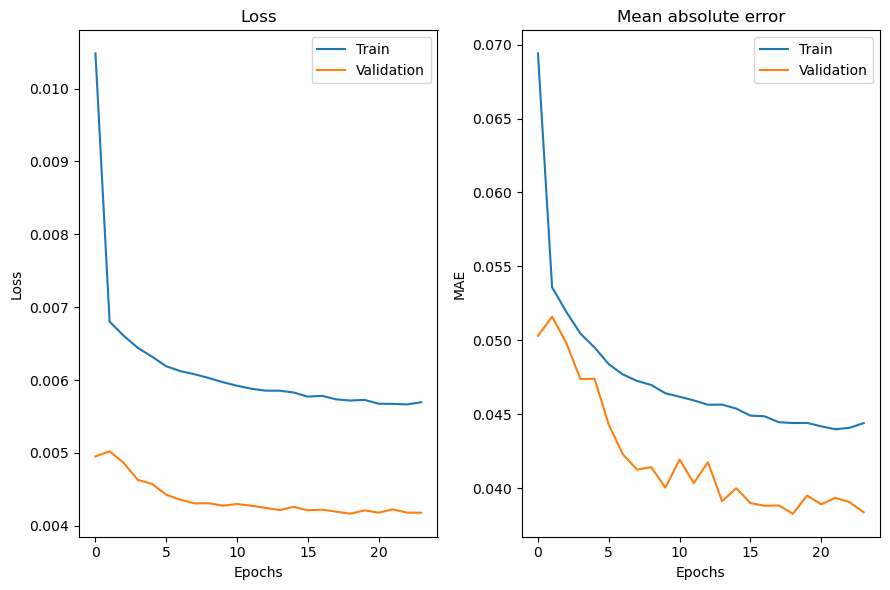

In [98]:
plot_history(mo_dnn_history)

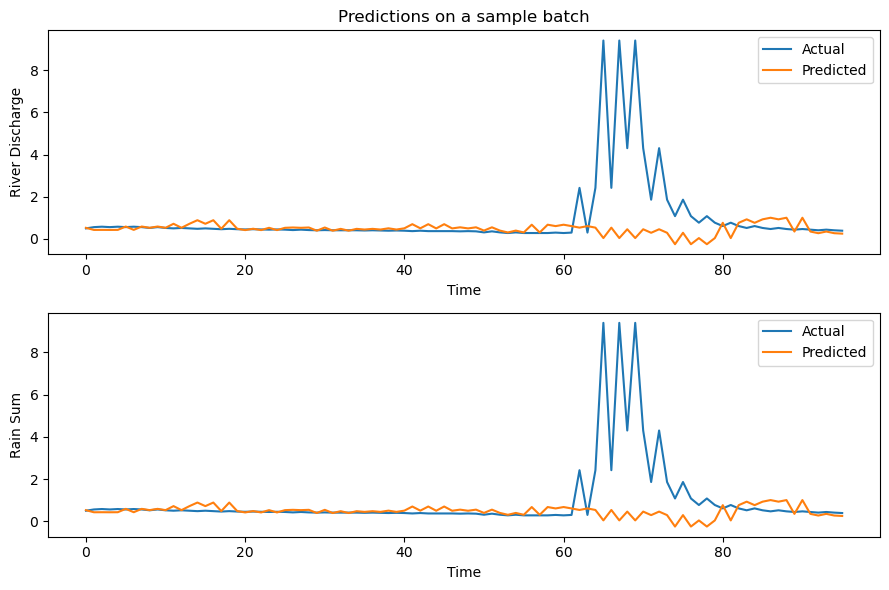

In [99]:
plot_predictions(mo_dnn, mo_sample_batch, 'multi_output')

Evaluation

In [100]:
def plot_evaluation(model_list, mae):
    
    fig, ax = plt.subplots()
    
    ax.bar(model_list, mae, width=0.3)
    ax.set_ylabel('MAE')
    ax.set_xlabel('Models')
    ax.set_ylim(0, max(mae)+0.15)
    for index, value in enumerate(mae):
        ax.text(x=index, y=value+0.005, s=str(round(value, 3)), ha='center')
    
    plt.tight_layout()

In [101]:
mo_lstm = Sequential([
    LSTM(32, return_sequences=True),
    Dense(2)
])

mo_lstm_history = train_model(mo_lstm, train_ds_mo, val_ds_mo)

Epoch 1/50
85/85 [==============================] - 3s 9ms/step - loss: 0.0102 - mean_absolute_error: 0.0657 - val_loss: 0.0047 - val_mean_absolute_error: 0.0469
Epoch 2/50
85/85 [==============================] - 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0539 - val_loss: 0.0049 - val_mean_absolute_error: 0.0523
Epoch 3/50
85/85 [==============================] - 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0525 - val_loss: 0.0047 - val_mean_absolute_error: 0.0505
Epoch 4/50
85/85 [==============================] - 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0518 - val_loss: 0.0047 - val_mean_absolute_error: 0.0493
Epoch 5/50
85/85 [==============================] - 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0512 - val_loss: 0.0046 - val_mean_absolute_error: 0.0487
Epoch 6/50
85/85 [==============================] - 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0507 - val_loss: 0.0047 - val_mean_absolute_error: 0.0485
Epoch 7/50
85/85 [==========

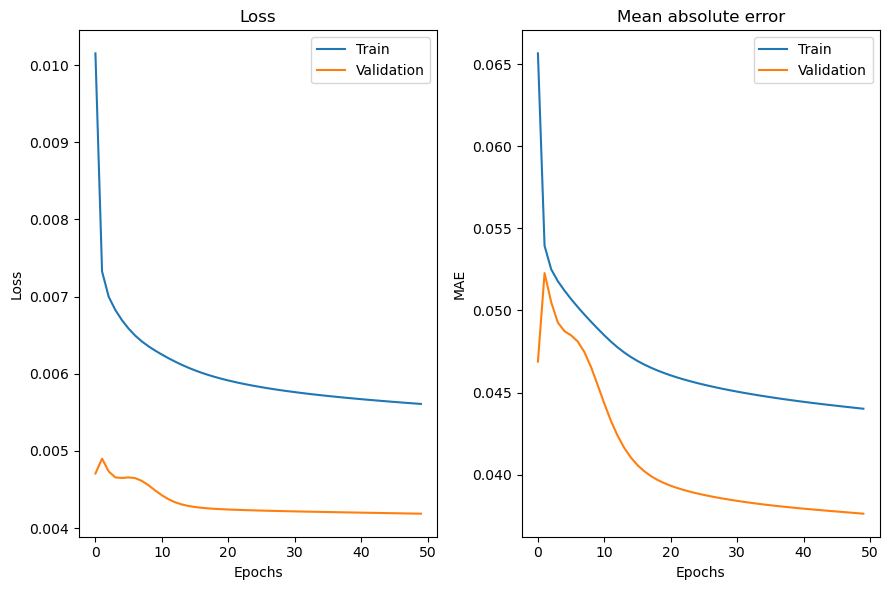

In [105]:
plot_history(mo_lstm_history)

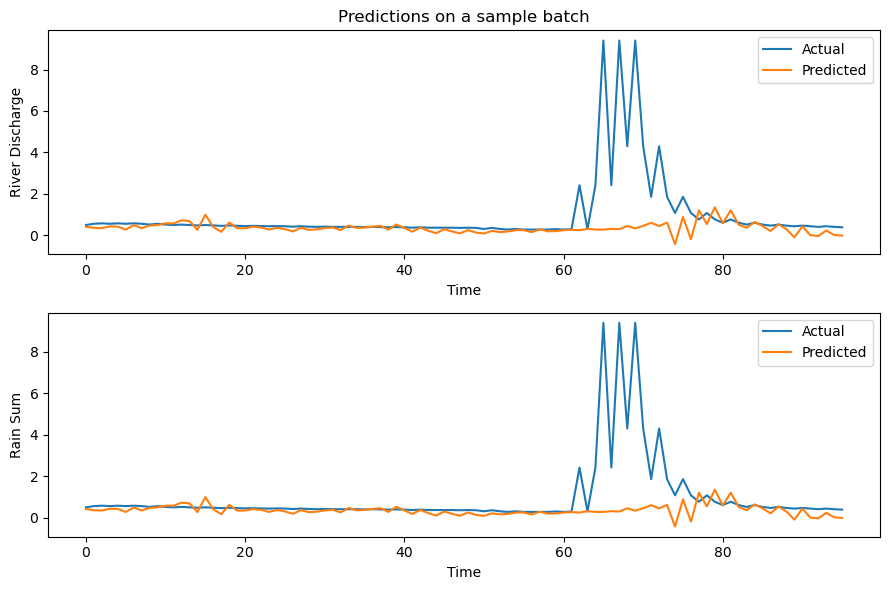

In [106]:
plot_predictions(mo_lstm, mo_sample_batch, 'multi_output')

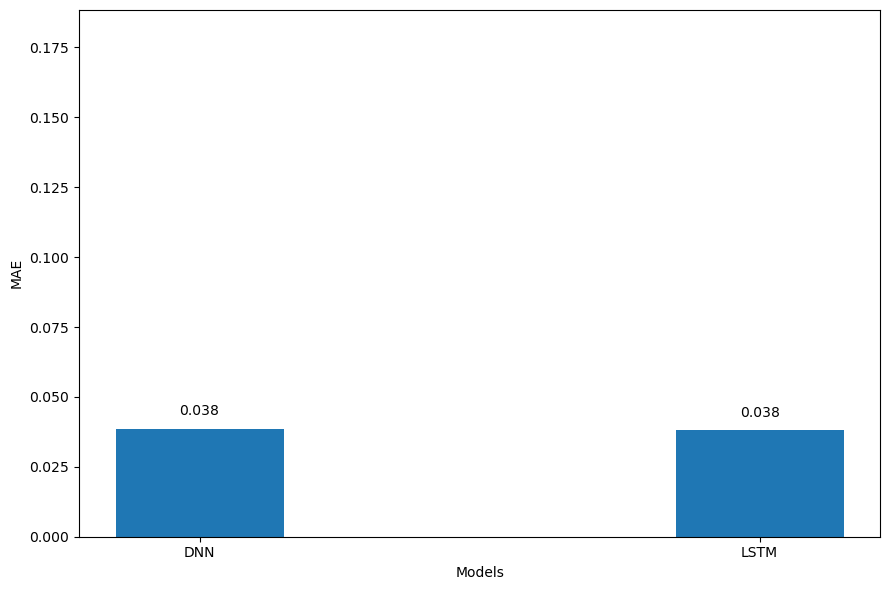

In [107]:
model_list = ['DNN','LSTM']

mo_mae = [0.0384,0.0380]

plot_evaluation(model_list, mo_mae)

In [111]:
mo_lstm.save("lstm_dhaka_model.h5")